In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
a_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/vgsales.csv")
a_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
a_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
a_data.drop(["Rank","Year"], axis=1, inplace=True)
a_data

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
for nama in a_data["Name"].unique():
    print(nama)

Wii Sports
Super Mario Bros.
Mario Kart Wii
Wii Sports Resort
Pokemon Red/Pokemon Blue
Tetris
New Super Mario Bros.
Wii Play
New Super Mario Bros. Wii
Duck Hunt
Nintendogs
Mario Kart DS
Pokemon Gold/Pokemon Silver
Wii Fit
Wii Fit Plus
Kinect Adventures!
Grand Theft Auto V
Grand Theft Auto: San Andreas
Super Mario World
Brain Age: Train Your Brain in Minutes a Day
Pokemon Diamond/Pokemon Pearl
Super Mario Land
Super Mario Bros. 3
Grand Theft Auto: Vice City
Pokemon Ruby/Pokemon Sapphire
Pokemon Black/Pokemon White
Brain Age 2: More Training in Minutes a Day
Gran Turismo 3: A-Spec
Call of Duty: Modern Warfare 3
Pokémon Yellow: Special Pikachu Edition
Call of Duty: Black Ops
Pokemon X/Pokemon Y
Call of Duty: Black Ops 3
Call of Duty: Black Ops II
Call of Duty: Modern Warfare 2
Grand Theft Auto III
Super Smash Bros. Brawl
Animal Crossing: Wild World
Mario Kart 7
Halo 3
Pokemon HeartGold/Pokemon SoulSilver
Super Mario 64
Gran Turismo 4
Super Mario Galaxy
Pokemon Omega Ruby/Pokemon Alpha Sap

In [9]:
def fix_name(a_str):
    new_str = a_str.split('(')
    if len(new_str) == 1:
        return new_str[0]
    else:
        return new_str[0][:-1]

a_data['Name'] = a_data['Name'].apply(fix_name)

In [10]:
a_data[a_data['Name'].str.contains('sales')]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [11]:
a_data[a_data['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,Need for Speed: Most Wanted,PS2,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,Need for Speed: Most Wanted,PS3,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,Need for Speed: Most Wanted,X360,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,Need for Speed: Most Wanted,X360,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,Need for Speed: Most Wanted,PSV,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,Need for Speed: Most Wanted,XB,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,Need for Speed: Most Wanted,GC,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,Need for Speed: Most Wanted,PC,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,Need for Speed: Most Wanted,WiiU,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,Need for Speed: Most Wanted,DS,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


In [12]:
a_data = a_data.groupby(['Name', 'Publisher', 'Genre', 'Platform']).sum()
a_data.reset_index(inplace= True)

In [13]:
a_data['Platform'] = 1
a_data.rename(columns = {'Platform': 'Platform_Count'}, inplace=True)
a_data = a_data.groupby(['Name', 'Publisher', 'Genre']).sum()
a_data.reset_index(inplace = True)
a_data.set_index('Name', inplace = True)
a_data.head()

,Publisher,Genre,Platform_Count,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,
'98 Koshien,Magical Company,Sports,1,0.15,0.10,0.12,0.03,0.41
.hack//G.U. Vol.1//Rebirth,Namco Bandai Games,Role-Playing,1,0.00,0.00,0.17,0.00,0.17
.hack//G.U. Vol.2//Reminisce,Namco Bandai Games,Role-Playing,1,0.11,0.09,0.16,0.03,0.39
.hack//G.U. Vol.3//Redemption,Namco Bandai Games,Role-Playing,1,0.00,0.00,0.17,0.00,0.17
.hack//Infection Part 1,Atari,Role-Playing,1,0.49,0.38,0.26,0.13,1.27


In [14]:
def sales_region(cols):
    type_dict= {'0': 'NA',
                '1': 'EU',
                '2': 'JP',
                '3': 'Others',
                '01': 'NA & EU',
                '02': 'NA & JP',
                '03': 'NA & Others',
                '12': 'EU & JP',
                '13': 'EU & Others',
                '23': 'JP & Others',
                '012': 'NA, EU, & JP',
                '013': 'NA, EU, & Others',
                '023': 'NA, JP, & Others',
                '123': 'EU, JP, & Others',
                '0123': 'All Region'
               }
    type_str = ''
    if cols[3] > 0:
        type_str += '0'
        
    if cols[4] > 0:
        type_str += '1'
        
    if cols[5] > 0:
        type_str += '2'
    
    if cols[6] > 0:
        type_str += '3'
    
    return type_dict[type_str]

a_data['Sales_Region'] = a_data.apply(sales_region, axis=1)
a_data.head()

,Publisher,Genre,Platform_Count,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sales_Region
Name,,,,,,,,,
'98 Koshien,Magical Company,Sports,1,0.15,0.10,0.12,0.03,0.41,All Region
.hack//G.U. Vol.1//Rebirth,Namco Bandai Games,Role-Playing,1,0.00,0.00,0.17,0.00,0.17,JP
.hack//G.U. Vol.2//Reminisce,Namco Bandai Games,Role-Playing,1,0.11,0.09,0.16,0.03,0.39,All Region
.hack//G.U. Vol.3//Redemption,Namco Bandai Games,Role-Playing,1,0.00,0.00,0.17,0.00,0.17,JP
.hack//Infection Part 1,Atari,Role-Playing,1,0.49,0.38,0.26,0.13,1.27,All Region


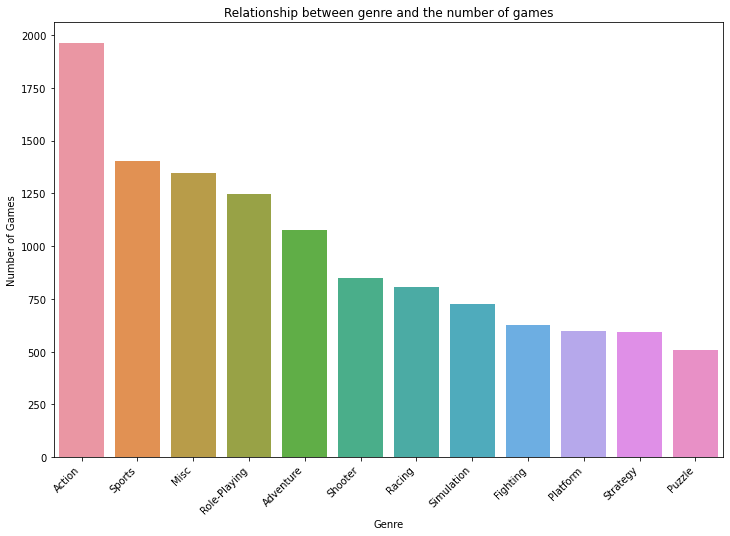

In [15]:
plt.figure(figsize = (12, 8))
sns.countplot(x='Genre', data = a_data, order = pd.DataFrame(a_data['Genre'].value_counts()).index)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between genre and the number of games')
plt.ylabel('Number of Games')
plt.show()

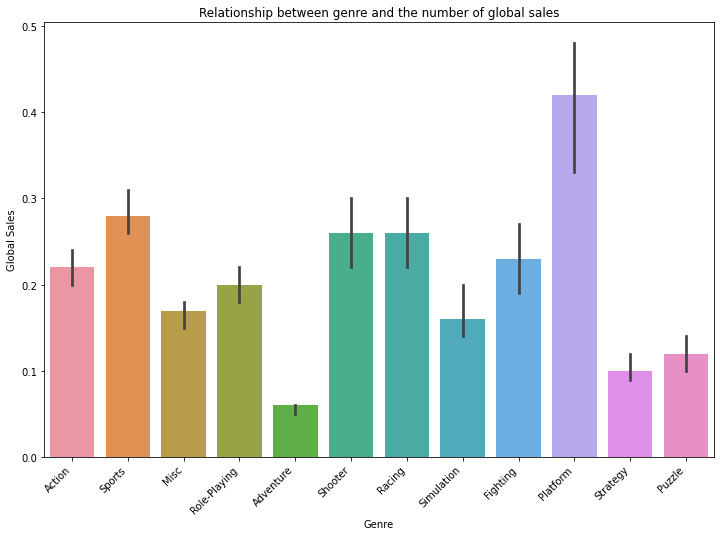

In [16]:
plt.figure(figsize = (12, 8))
sns.barplot(x='Genre', y='Global_Sales',data = a_data, estimator=np.median, order = pd.DataFrame(a_data['Genre'].value_counts()).index)
plt.title('Relationship between genre and the number of global sales')
plt.ylabel('Global Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
a_data["Platform_Count"].value_counts()

1     9178
2     1393
3      654
4      258
5      136
6       75
7       32
8       11
9        3
10       1
Name: Platform_Count, dtype: int64

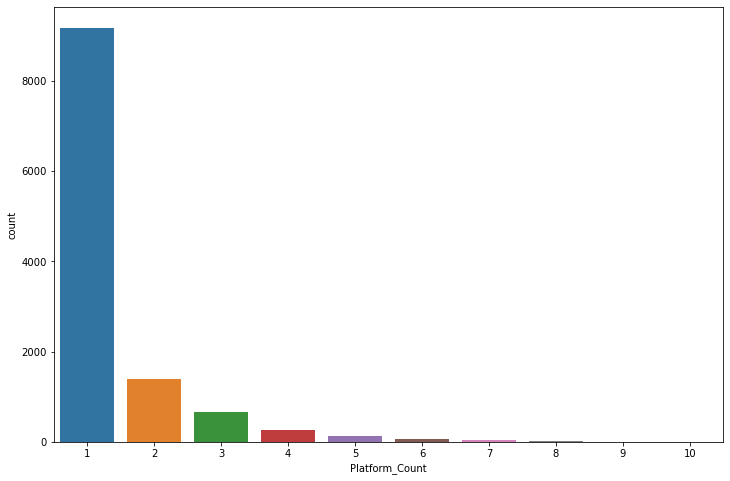

In [18]:
plt.figure(figsize = (12, 8))
sns.countplot(x='Platform_Count', data = a_data)

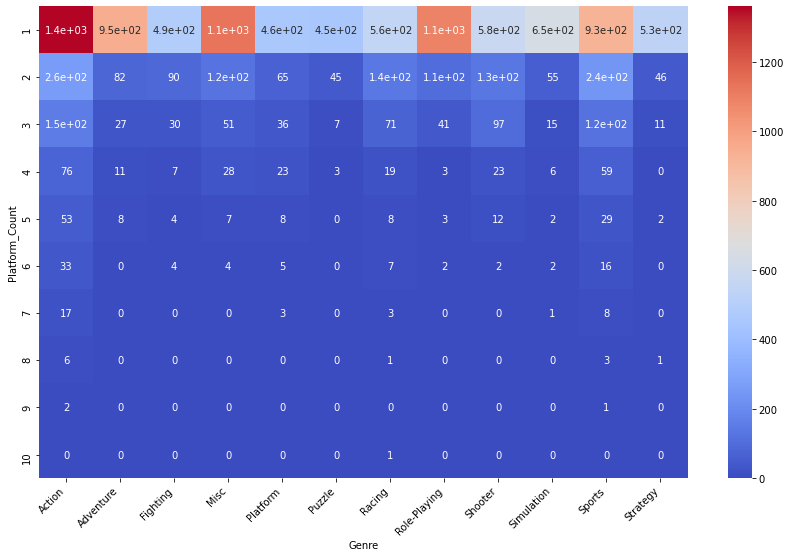

In [19]:
plt.figure(figsize = (12, 8))
sns.heatmap(pd.crosstab(a_data['Platform_Count'], a_data['Genre']), cmap = 'coolwarm', annot = True)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

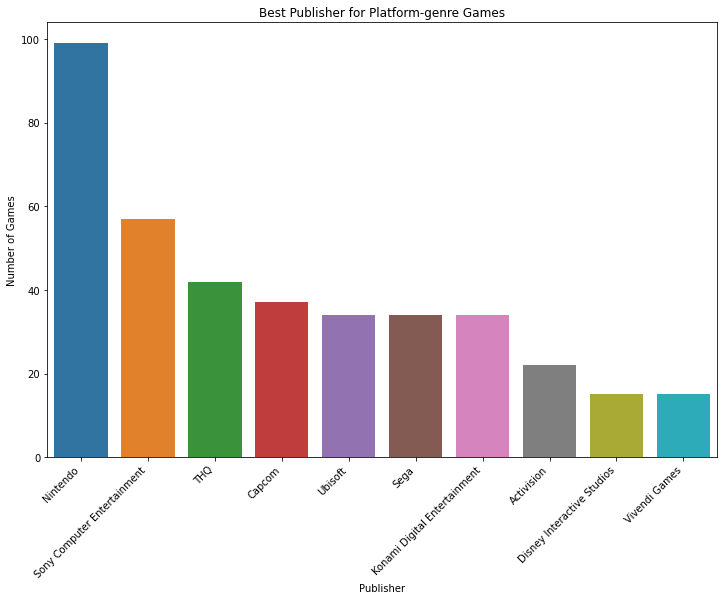

In [20]:
platform_data = a_data[a_data['Genre'] == 'Platform']

plt.figure(figsize = (12, 8))
sns.countplot(x='Publisher', data = platform_data, order = pd.DataFrame(platform_data['Publisher'].value_counts()).index[:10])
plt.title('Best Publisher for Platform-genre Games')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.show()

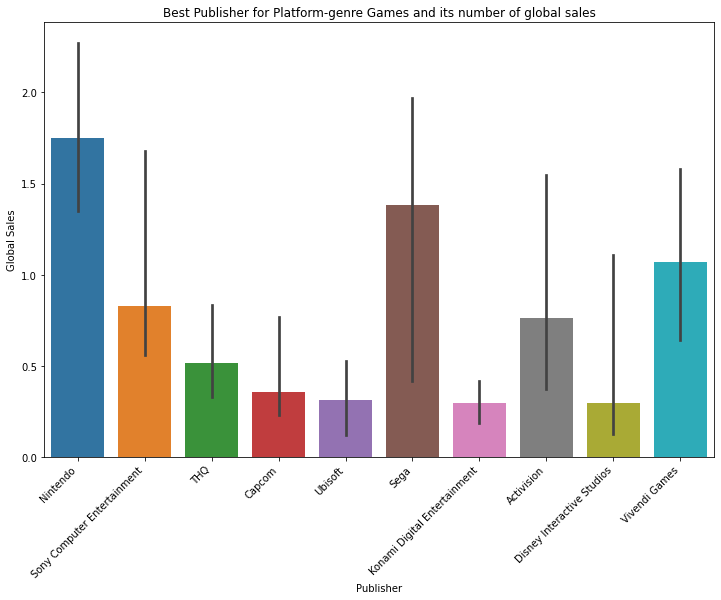

In [21]:
plt.figure(figsize = (12, 8))
sns.barplot(x='Publisher', y='Global_Sales',data = platform_data, estimator=np.median, order = pd.DataFrame(platform_data['Publisher'].value_counts()).index[:10])
plt.title('Best Publisher for Platform-genre Games and its number of global sales')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.show()

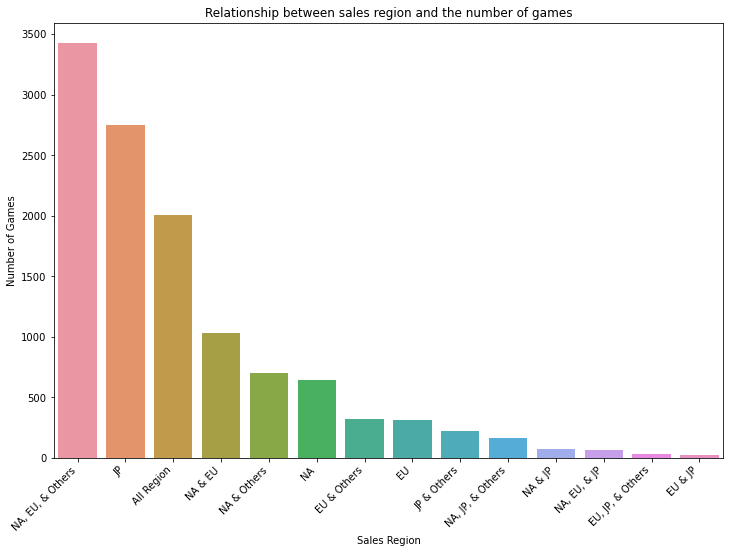

In [22]:
plt.figure(figsize = (12, 8))
sns.countplot(x='Sales_Region', data = a_data, order = pd.DataFrame(a_data['Sales_Region'].value_counts()).index)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between sales region and the number of games')
plt.xlabel('Sales Region')
plt.ylabel('Number of Games')
plt.show()

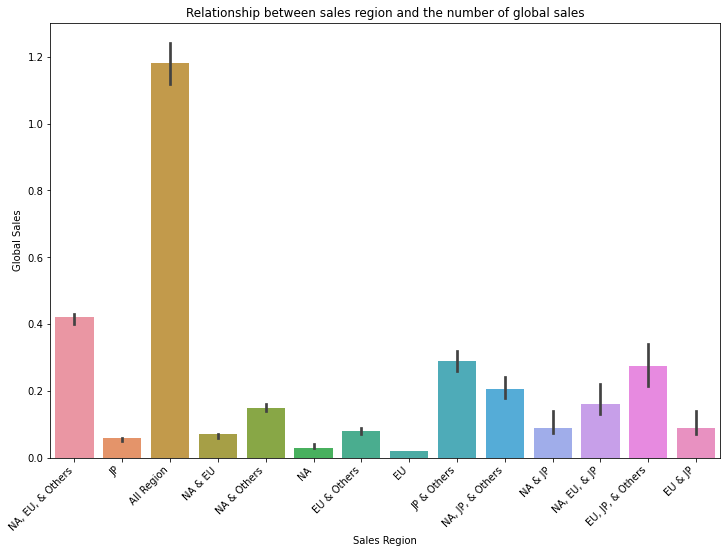

In [23]:
plt.figure(figsize = (12, 8))
sns.barplot(x='Sales_Region', y='Global_Sales',data = a_data, estimator=np.median, order = pd.DataFrame(a_data['Sales_Region'].value_counts()).index)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between sales region and the number of global sales')
plt.xlabel('Sales Region')
plt.ylabel('Global Sales')
plt.show()